El método implicito es:
$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$
Observen que en cada paso hay que resolver una ecuación algebraica, por ej, para el primer paso $x_1=x_0+f(x_1,t_1)h$
tenemos que despejar $x_1$. Una forma es utilizar el método de Newton que ya desarrollaron, es decir, si tomamos $g(x)=x-f(x,t_1)h$, el método nos dice que:
$$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$
Para asegurar que $\tilde x_k$ converge a $x_1$ (puesto que en general $g(x)$ tiene muchas raices), tenemos que tomar $\tilde x_0$ lo mas cerca posible de $x_1$, lo más prudente es tomar $\tilde x_0=x_0$. Por lo tanto, para cualquier paso tenemos que si conocemos $x_n$, entonces $x_{n+1}$ esta dado por el límite 

$$x_{n+1}=\lim_{k\to \infty}\tilde x_k,$$
donde $\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}$, con $g(x)=x_n-f(x,t_n)$.

Otra forma de encontrar $x_{n+1}$ sin tener necesidad de calcular la derivada explicitamente, es modificar el método de Newton usando una derivada númerica. Otra forma es utilizar el método de punto fijo.

En la teoría de sistemas dinámicos discretos, donde estos se definen como:
$$x_{n+1}=F(x_n),$$
Obsérvese que el método de Newton y el método de Euler tienen esta forma.

Cuándo $x_n$ converge a alguna parte en el límite de $n\to\infty$, se dice que existe un _punto fijo estable_ y que la condición inicial del nuestro sistema dinámico esta en la _cuenca de atracción_ de dicho _punto fijo estable_ (también conocido como atractor, y sí, existen los repulsores). 
Los puntos fijos, $x^*$, cumplen:
$$x^*=f(x^*),$$
por eso se les dice _fijos_, si el sistema comienza en uno de ellos, la suceción es constante.
Entonces, para resolver la ecuación algebraica presente en el método de Euler, podemos hacer las siguientes identificaciones:

$$x_{n+1}\to x^*\text{ ,y}$$
$$x_n+f(x,t_{n+1})h\to F(x).$$
Es decir, $x_{n+1}$ (con $x_n$ obviamente conocido) es un punto fijo del sistema dinámico:
$$ x_{n+1}^{[k+1]}=x_n+f(x_{n+1}^{[k]},t_{n+1})h,$$
nuevamente es prudente utilizar $x_{n+1}^{[0]}=x_n$.

__Ejercicio 1:__. Implementar método implicito de Euler como quieran.

In [21]:
function implicito(f,t0,tf,x0,h) # ahora hacemos la funcion de Euler implicito
    x = x0 # igualamos x a x0
    X= [] # Definimos un arreglo donde se iran guardando los datos
    push!(X,x) #llenamos nuestro arreglo con las x
    T= linspace(t0,tf,(tf-t0)/h+1) # con esto se crea  intervalos
    for i in 2:length(T)  # con este ciclo for se implementara nuestra formula
        t = i*h
        g(x)= x - X[i-1] - h*f(x,T[i])
        u = Newton_ultimate(g,T[length(T)])
        push!(X,u)
    end
    return X,T
end

implicito (generic function with 1 method)

In [2]:
function f(x,t)
    -(2.5)*x
end

f (generic function with 1 method)

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

In [3]:
function PuntoM(f,x0,t0,tf,h)
    x = x0 # igualamos x a x0
    Xx = [] # Definimos un arreglo donde se iran guardando los datos
    push!(X,x) #llenamos nuestro arreglo con las x
    T = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    for i in 2:length(T)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h/2
        push!(X,x)
    end  
    return X,T
end

PuntoM (generic function with 1 method)

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [11]:
function MetodoRunge(f,alfa,t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X = []
    t = t0
    x = alfa
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    scatter(T,X)
    title("Runge Kutta orden 4")
end

MetodoRunge (generic function with 1 method)

In [5]:
function F(t,w)
    return w-(1/2)*exp(t/2)*sin(5t) + 5exp(t/2)*cos(5t) #Utilizamos esta ecuación para probar nuestro método
end

F (generic function with 1 method)

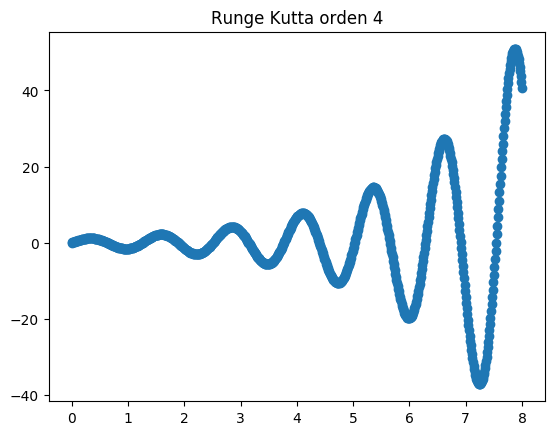

PyObject <matplotlib.text.Text object at 0x7fb6aed1f250>

In [12]:
MetodoRunge(F,0,0,0.01,8) 

In [2]:
using PyPlot

__Ejercicio 5:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

In [13]:
function euler(f,x0,t0,tf,h) #comenzamos haciendo la función
    x = x0 # igualamos x a x0
    X= [] # Definimos un arreglo donde se iran guardando los datos
    push!(X,x) #llenamos nuestro arreglo con las x
    T= linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(T)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h
        push!(X,x)
    end
    
    
    return X,T
end

euler (generic function with 1 method)

In [14]:
function g(x,t)
    exp.(-5t/2)
end

g (generic function with 1 method)

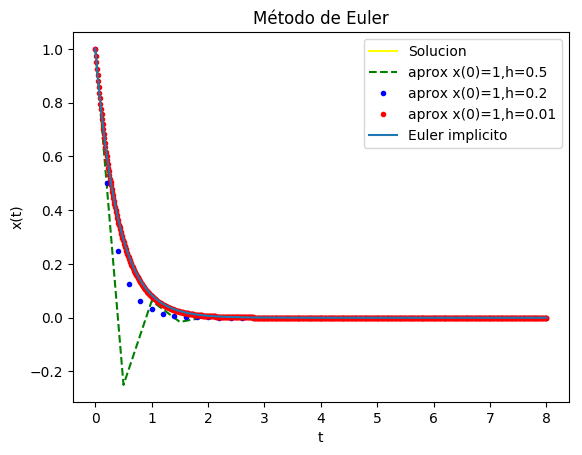

PyObject <matplotlib.legend.Legend object at 0x7fb6aa47bb50>

In [22]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,g(1,t),label= "Solucion", color= "yellow")
legend()
plot(euler((x,t)->-(2.5)*x,1,0,8,0.5)[2],euler((x,t)->-(2.5)*x,1,0,8,0.5)[1],label= "aprox x(0)=1,h=0.5","--",color="green")
legend()
plot(euler((x,t)->-(2.5)*x,1,0,8,0.2)[2],euler((x,t)->-(2.5)*x,1,0,8,0.2)[1],label= "aprox x(0)=1,h=0.2",".",color="blue")
legend()
plot(euler((x,t)->-(2.5)*x,1,0,8,0.01)[2],euler((x,t)->-(2.5)*x,1,0,8,0.01)[1],label= "aprox x(0)=1,h=0.01",".",color="red")
legend()

plot(implicito((x,t)->-(2.5)*x,0.0,8.0,1.0,0.01)[2],implicito((x,t)->-(2.5)*x,0.0,8.0,1.0,0.01)[1],label="Euler implicito")
legend()

In [18]:
using SymPy
A,x,a,n,m=symbols("A,x,a,n,m") # Definimos las variables simbolicas que se ocupan

(A,x,a,n,m)

In [19]:
function Newton_ultimate(f,x0)
    df = simplify(diff(f),[x])
    d = lambdify(df,[x])
    for i in 1:200
    x0= x0-(f(x0)/d(x0))  
    end
    return x0
  end

Newton_ultimate (generic function with 1 method)

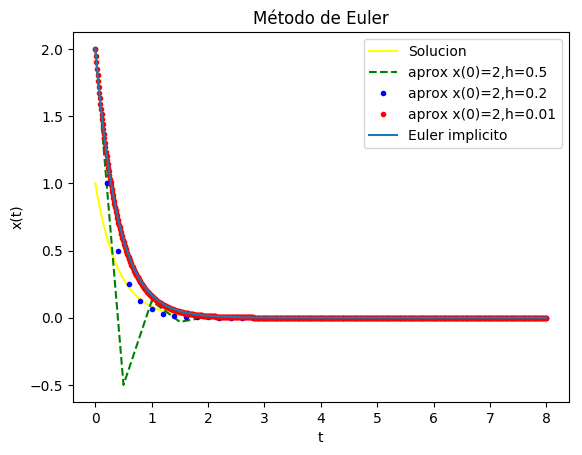

PyObject <matplotlib.legend.Legend object at 0x7fb6aa06e4d0>

In [24]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,g(1,t),label= "Solucion", color= "yellow")
plot(euler((x,t)->-(2.5)*x,2,0,8,0.5)[2],euler((x,t)->-(2.5)*x,2,0,8,0.5)[1],label= "aprox x(0)=2,h=0.5","--",color="green")
legend()
plot(euler((x,t)->-(2.5)*x,2,0,8,0.2)[2],euler((x,t)->-(2.5)*x,2,0,8,0.2)[1],label= "aprox x(0)=2,h=0.2",".",color="blue")
legend()
plot(euler((x,t)->-(2.5)*x,2,0,8,0.01)[2],euler((x,t)->-(2.5)*x,2,0,8,0.01)[1],label= "aprox x(0)=2,h=0.01",".",color="red")
legend()
plot(implicito((x,t)->-(2.5)*x,0.0,8.0,2.0,0.01)[2],implicito((x,t)->-(2.5)*x,0.0,8.0,2.0,0.01)[1],label="Euler implicito")
legend()

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [4]:
function r(t,w)    
    (2w-18t)/(1+t)
end

r (generic function with 1 method)

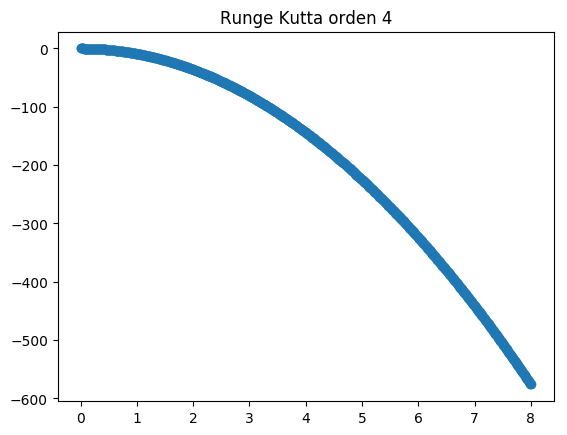

PyObject <matplotlib.text.Text object at 0x7fb6a9f4f8d0>

In [27]:
MetodoRunge(r,0,0,0.01,8) 

In [47]:
function Runge(f,alfa,t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X = []
    t = t0
    x = alfa
    tp=linspace(0,8,1001)
    Real=[]
    for i in 1:length(tp)
        r=4+(8*tp[i])-(5*tp[i]*tp[i])
        push!(Real,r)
    end
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    scatter(T,X,color="gold")#Es la aprox por runge
    plot(tp,Real,color="red")#Es la solucion real
    title("Runge Kutta orden 4")
end

Runge (generic function with 1 method)

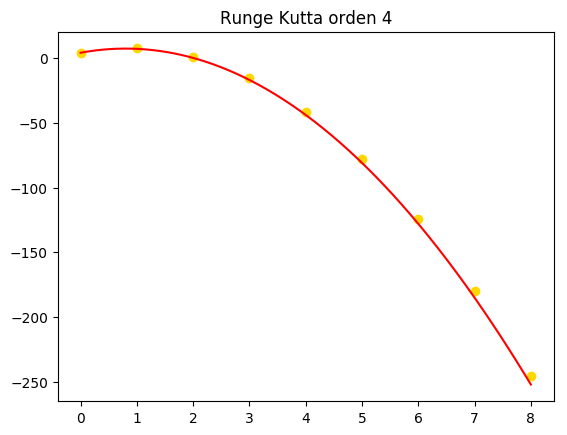

PyObject <matplotlib.text.Text object at 0x7fb6a919d290>

In [54]:
Runge(r,4,0,1,8) #aqui voy variando H para ver como cuando h se hace chica la aproximacion es cada vez mejor

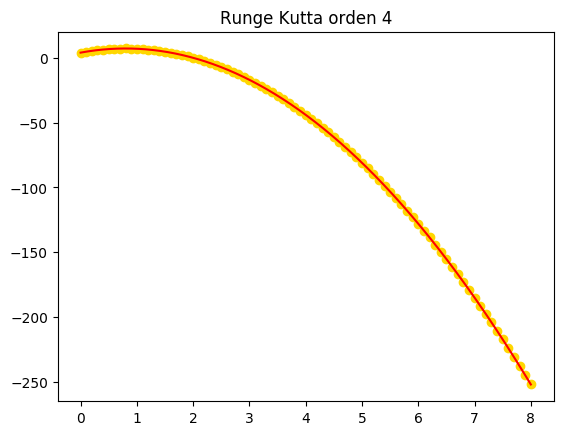

PyObject <matplotlib.text.Text object at 0x7fb6a90e42d0>

In [55]:
Runge(r,4,0,0.1,8) 

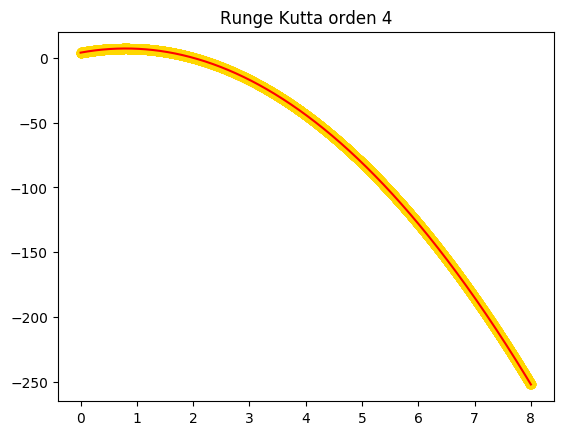

PyObject <matplotlib.text.Text object at 0x7fb6a90c70d0>

In [56]:
Runge(r,4,0,0.001,8) 

In [7]:
function PuntoMedio(f,x0,t0,tf,h)
    x = x0 # igualamos x a x0
    X = [] # Definimos un arreglo donde se iran guardando los datos
    push!(X,x) #llenamos nuestro arreglo con las x
    T = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    tp=linspace(0,8,1001)
    Real=[]
    for i in 1:length(tp)
        r=4+(8*tp[i])-(5*tp[i]*tp[i])
        push!(Real,r)
    end
    for i in 2:length(T)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(t,x)*h/2
        push!(X,x)
    end  
    scatter(T,X,color="gold")
    plot(tp,Real,color="red")#Es la solucion real
    title("Euler Punto Medio")
end

PuntoMedio (generic function with 1 method)

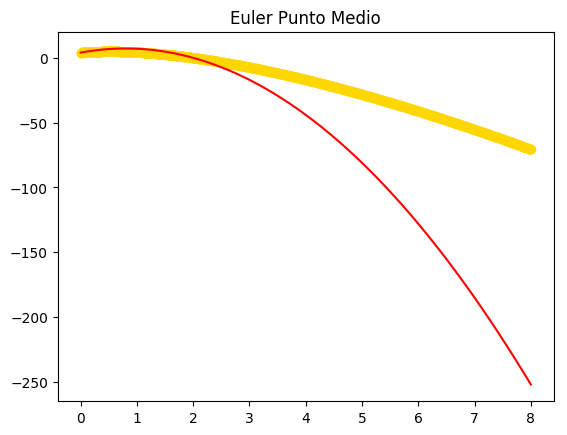

PyObject <matplotlib.text.Text object at 0x7f92eb6e4a50>

In [8]:
PuntoMedio(r,4,0,8,0.01)

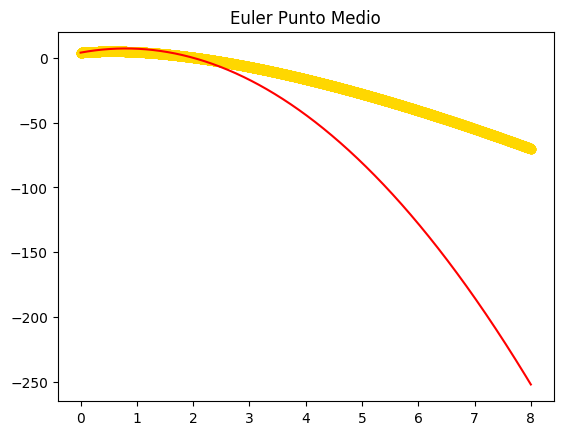

PyObject <matplotlib.text.Text object at 0x7f92eb416e10>

In [9]:
PuntoMedio(r,4,0,8,0.001)